### 나이브 베이즈 분류기

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.datasets import fetch_covtype, fetch_20newsgroups
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn import metrics

In [2]:
prior = [0.45, 0.3 ,0.15, 0.1]
likelihood = [[0.3, 0.3, 0.4], [0.7, 0.2, 0.1], [0.15, 0.5, 0.35], [0.6, 0.2, 0.2]] 

idx = 0
for c, xs in zip(prior, likelihood):
  result = 1.

  for x in xs:
    result *= x
  result *= c

  idx += 1
  print(f'{result}')

0.0162
0.0042
0.0039375
0.0024000000000000002


In [22]:
covtype = fetch_covtype() # 산림 토양 데이터
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [24]:
covtype_x = covtype.data
covtype_y = covtype.target

In [25]:
covtype_x_train, covtype_x_test, covtype_y_train, covtype_y_test = train_test_split(covtype_x, covtype_y, test_size=0.2)

In [26]:
covtype_df = pd.DataFrame(data=covtype_x, columns=covtype.feature_names)

In [27]:
covtype_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
scaler = StandardScaler()
covtype_x_train_scale = scaler.fit_transform(covtype_x_train)
covtype_x_test_scale = scaler.transform(covtype_x_test)

In [11]:
newsgroup = fetch_20newsgroups()
print(newsgroup.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [12]:
newsgroup.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
newsgroup_train = fetch_20newsgroups(subset='train')
newsgroup_test = fetch_20newsgroups(subset='test')

In [17]:
x_train, y_train = newsgroup_train.data, newsgroup_train.target
x_test, y_test = newsgroup_test.data, newsgroup_test.target

In [18]:
count_vectorizer = CountVectorizer() # 문서에 나온 단어의 수를 세서 벡터 생성
x_train_count = count_vectorizer.fit_transform(x_train)
x_test_count = count_vectorizer.transform(x_test)

In [19]:
hash_vectorizer = HashingVectorizer(n_features=1000)
x_train_hash = hash_vectorizer.fit_transform(x_train)
x_test_hash = hash_vectorizer.transform(x_test)

In [20]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

### 가우시안 나이브 베이즈
- 입력 특성이 정규 분포 갖는다고 가정

In [29]:
model = GaussianNB()
model.fit(covtype_x_train_scale, covtype_y_train)

GaussianNB()

In [30]:
pred = model.predict(covtype_x_train_scale)
acc = metrics.accuracy_score(covtype_y_train, pred)
f1 = metrics.f1_score(covtype_y_train, pred, average=None)

print(f'acc : {acc}')
print(f'f1 : {f1}')

acc : 0.0880727352525446
f1 : [0.04069601 0.01782721 0.33566183 0.13832142 0.04352647 0.06902005
 0.23776596]


In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [35]:
def make_meshgrid(x, y, h=.2):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy, = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

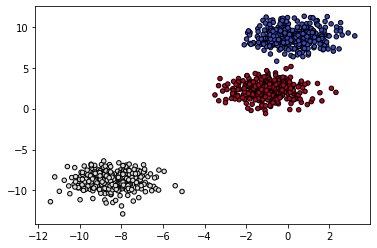

In [33]:
X, y = make_blobs(n_samples=1000)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

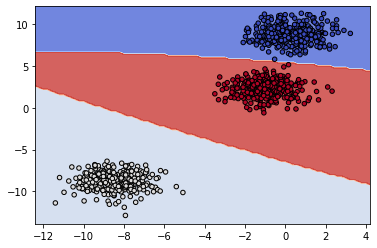

In [36]:
model.fit(X, y)

xx, yy = make_meshgrid(X[:, 0], X[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 베르누이 나이브 베이즈
- 입력 특성이 베르누이 분포라고 가정

In [37]:
model = BernoulliNB()
model.fit(x_train_count, y_train)

BernoulliNB()

In [38]:
pred = model.predict(x_train_count)
acc = metrics.accuracy_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred, average=None)

print(f'train acc : {acc}')
print(f'train f1 : {f1}')

train acc : 0.7821283365741559
train f1 : [0.80096502 0.8538398  0.13858268 0.70686337 0.85220126 0.87944493
 0.51627694 0.84532672 0.89064976 0.87179487 0.94561404 0.91331546
 0.84627832 0.89825848 0.9047619  0.79242424 0.84693878 0.84489796
 0.67329545 0.14742015]


In [39]:
pred = model.predict(x_test_count)
acc = metrics.accuracy_score(y_test, pred)
f1 = metrics.f1_score(y_test, pred, average=None)

print(f'test acc : {acc}')
print(f'test f1 : {f1}')

test acc : 0.6307753584705258
test f1 : [0.47086247 0.60643564 0.01       0.56014047 0.6953405  0.70381232
 0.44829721 0.71878646 0.81797753 0.81893491 0.90287278 0.74794521
 0.61647059 0.64174455 0.76967096 0.63555114 0.64285714 0.77971474
 0.31382979 0.00793651]


In [40]:
model.fit(x_train_hash, y_train)

pred = model.predict(x_train_hash)
acc = metrics.accuracy_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred, average=None)

print(f'train acc : {acc}')
print(f'train f1 : {f1}')

train acc : 0.5951917977726711
train f1 : [0.74226804 0.49415205 0.45039019 0.59878155 0.57327935 0.63929619
 0.35390947 0.59851301 0.72695347 0.68123862 0.79809524 0.70532319
 0.54703833 0.66862745 0.61889927 0.74707471 0.6518668  0.60485269
 0.5324165  0.54576271]


In [41]:
pred = model.predict(x_test_hash)
acc = metrics.accuracy_score(y_test, pred)
f1 = metrics.f1_score(y_test, pred, average=None)

print(f'test acc : {acc}')
print(f'test f1 : {f1}')

test acc : 0.4430430164630908
test f1 : [0.46678636 0.33826638 0.29391892 0.45743329 0.41939121 0.46540881
 0.34440068 0.46464646 0.62849873 0.53038674 0.63782051 0.55251799
 0.32635983 0.34266886 0.46105919 0.61780105 0.46197991 0.54591837
 0.27513228 0.3307888 ]


In [42]:
model.fit(x_train_tfidf, y_train)

pred = model.predict(x_train_tfidf)
acc = metrics.accuracy_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred, average=None)

print(f'train acc : {acc}')
print(f'train f1 : {f1}')

train acc : 0.7821283365741559
train f1 : [0.80096502 0.8538398  0.13858268 0.70686337 0.85220126 0.87944493
 0.51627694 0.84532672 0.89064976 0.87179487 0.94561404 0.91331546
 0.84627832 0.89825848 0.9047619  0.79242424 0.84693878 0.84489796
 0.67329545 0.14742015]


In [43]:
pred = model.predict(x_test_tfidf)
acc = metrics.accuracy_score(y_test, pred)
f1 = metrics.f1_score(y_test, pred, average=None)

print(f'test acc : {acc}')
print(f'test f1 : {f1}')

test acc : 0.6307753584705258
test f1 : [0.47086247 0.60643564 0.01       0.56014047 0.6953405  0.70381232
 0.44829721 0.71878646 0.81797753 0.81893491 0.90287278 0.74794521
 0.61647059 0.64174455 0.76967096 0.63555114 0.64285714 0.77971474
 0.31382979 0.00793651]


### 다항 나이브 베이즈

In [44]:
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)

pred = model.predict(x_train_tfidf)
acc = metrics.accuracy_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred, average=None)

print(f'train acc : {acc}')
print(f'train f1 : {f1}')

train acc : 0.9326498143892522
train f1 : [0.87404162 0.95414462 0.95726496 0.92863002 0.97812773 0.97440273
 0.91090909 0.97261411 0.98659966 0.98575021 0.98026316 0.94033413
 0.9594478  0.98032506 0.97755611 0.77411003 0.93506494 0.97453907
 0.90163934 0.45081967]


In [45]:
pred = model.predict(x_test_tfidf)
acc = metrics.accuracy_score(y_test, pred)
f1 = metrics.f1_score(y_test, pred, average=None)

print(f'test acc : {acc}')
print(f'test f1 : {f1}')

test acc : 0.7738980350504514
test f1 : [0.63117871 0.72       0.72778561 0.72104019 0.81309686 0.81643836
 0.7958884  0.88135593 0.93450882 0.91071429 0.92917167 0.73583093
 0.69732938 0.81907433 0.86559803 0.60728118 0.76286353 0.92225201
 0.57977528 0.24390244]
